In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

## Data loading

In [2]:
df = pd.read_csv("data/sierraleone-bumbuna.csv")

## Summary Statistics & Missing Value Report

In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
df.shape

(525600, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [7]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Outlier detection

In [9]:
check=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[check].dropna() # dropped NA values
z_scores = np.abs(zscore(df_z))
outlier_z = z_scores > 3
total_outlier_rows = np.any(outlier_z, axis=1).sum()
total_outlier_rows

np.int64(16292)

# Drop empty columns

In [10]:
df.drop(columns=["Comments"], inplace=True)

## Cleaning Outliers

In [11]:
for col in check:
    z=zscore(df[col])
    outliers=np.abs(z)>3
    median=df[col].median()
    df.loc[outliers,col]=median

In [12]:
for col in check:
    z = zscore(df[col])
    outliers = np.abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers remaining")


GHI: 885 outliers remaining
DNI: 7803 outliers remaining
DHI: 1084 outliers remaining
ModA: 390 outliers remaining
ModB: 503 outliers remaining
WS: 1709 outliers remaining
WSgust: 2095 outliers remaining


## Cleaning Outliers
this is the second cleaning of the outliers cleaning more that this can affect the standard deviation of the data

In [13]:
for col in check:
    z=zscore(df[col])
    outliers=np.abs(z)>3
    median=df[col].median()
    df.loc[outliers,col]=median

In [14]:
for col in check:
    z = zscore(df[col])
    outliers = np.abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers remaining")

GHI: 296 outliers remaining
DNI: 8175 outliers remaining
DHI: 358 outliers remaining
ModA: 95 outliers remaining
ModB: 166 outliers remaining
WS: 0 outliers remaining
WSgust: 0 outliers remaining


In [15]:
df.to_csv("data/sierraleone-cleaned.csv", index=False) #export cleaned data

## Time Series Analysis

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\Bereket\AppData\Local\Temp\ipykernel_21644\364050496.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Bereket\Documents\week0\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


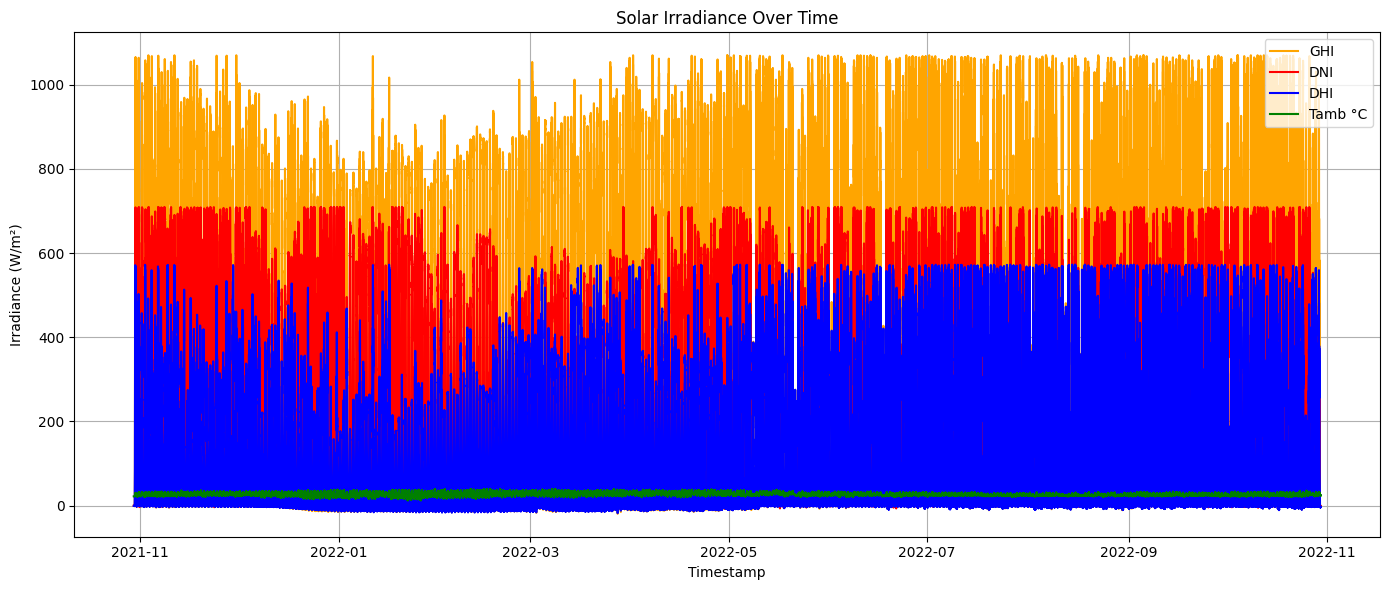

In [17]:
plt.figure(figsize=(14, 6))

plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='red')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='blue')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb °C', color='green')

plt.title('Solar Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


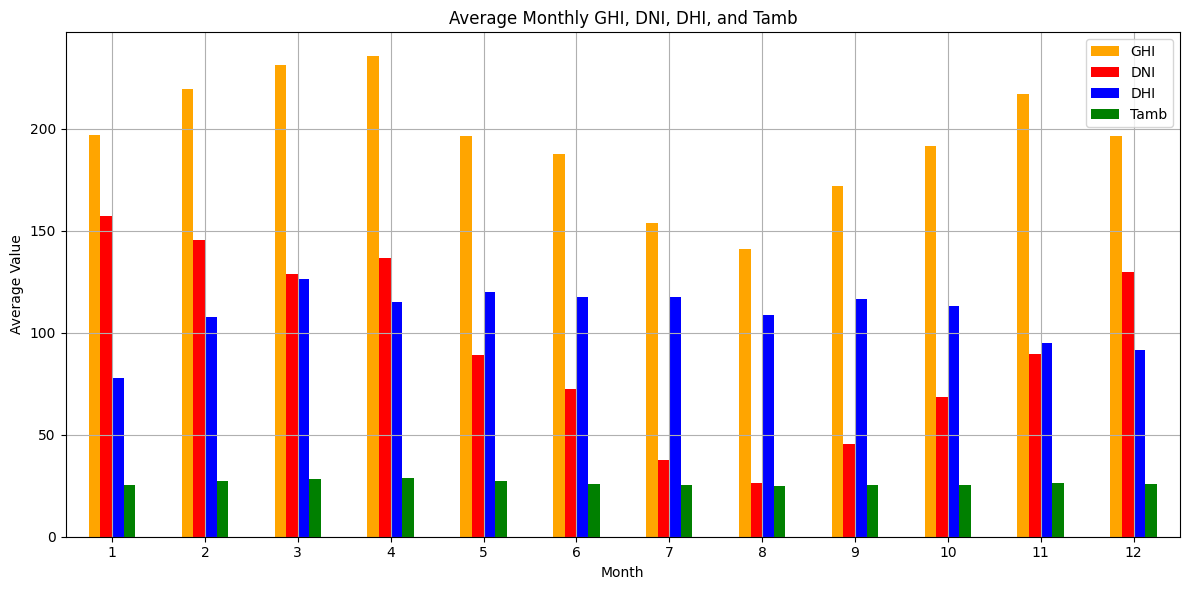

In [18]:
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

colors = {'GHI': 'orange','DNI': 'red','DHI': 'blue','Tamb': 'green'}

monthly_avg.plot(kind='bar', figsize=(12, 6), color=[colors[col] for col in monthly_avg.columns])

plt.title('Average Monthly GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


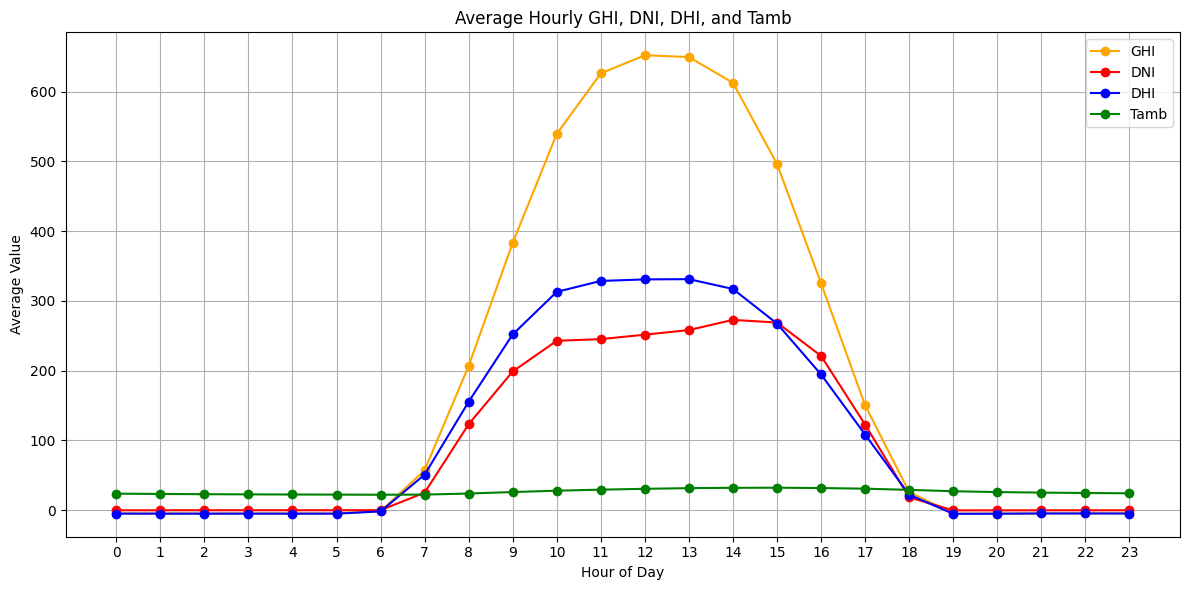

In [19]:
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot with custom colors for each variable
plt.figure(figsize=(12, 6))

plt.plot(hourly_avg.index, hourly_avg['GHI'], label='GHI', color='orange', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DNI'], label='DNI', color='red', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DHI'], label='DHI', color='blue', marker='o')
plt.plot(hourly_avg.index, hourly_avg['Tamb'], label='Tamb', color='green', marker='o')

plt.title('Average Hourly GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()



## Wind rose

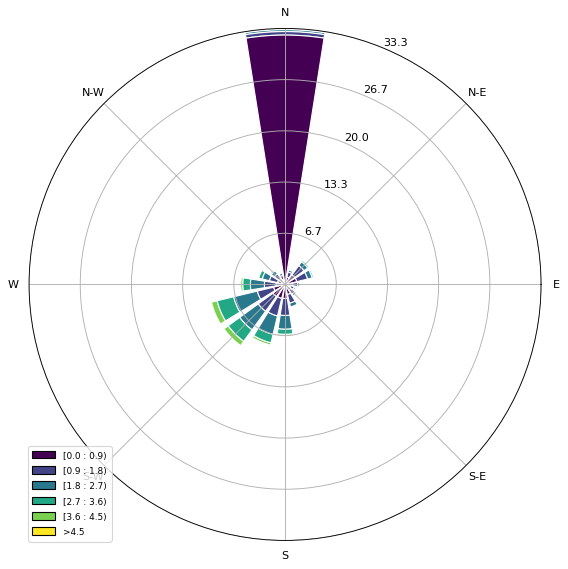

In [20]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

### 📈 Time Series Analysis Summary

- **Line plots** show clear daily cycles in GHI, DNI, DHI, and Tamb.
- Solar irradiance values peak between **11am–2pm**, with **Tamb** peaking shortly after due to heat lag.
- **Monthly trends** show that solar radiation is strongest in [insert months] and lowest in [insert months], likely due to [dry/wet season].
- Observed some spikes in temperature and sudden dips in GHI, indicating possible cloud cover or anomalies.
- This analysis supports identifying **optimal hours and months** for solar energy generation in Benin.


## Cleaning Impact on ModA and ModB

In [21]:
clean_impact=df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

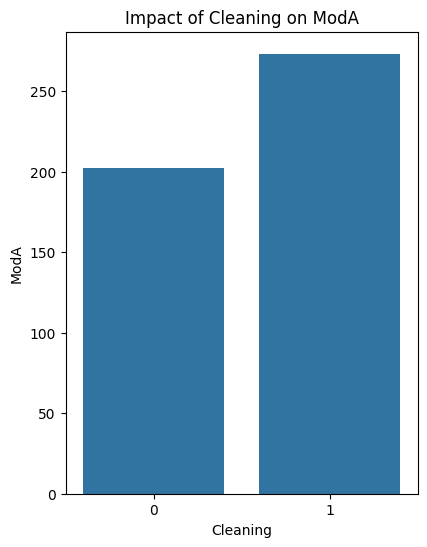

In [22]:
#plotting the impact of cleaning on ModA and ModB
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(x='Cleaning', y='ModA', data=clean_impact)
plt.title('Impact of Cleaning on ModA')
plt.show()

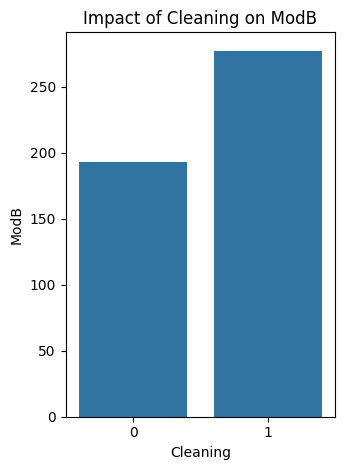

In [23]:
plt.subplot(1,2,2)
sns.barplot(x='Cleaning', y='ModB', data=clean_impact)
plt.title('Impact of Cleaning on ModB')
plt.tight_layout()
plt.show()

## Correlation Analysis

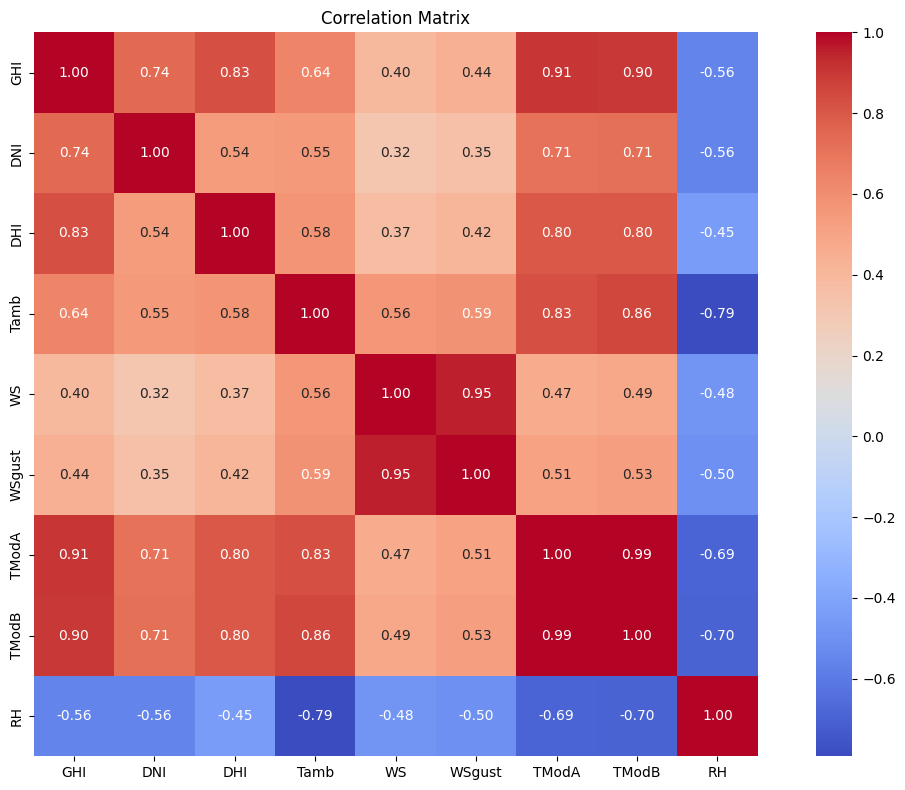

In [24]:
correlation=['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'WSgust', 'TModA', 'TModB','RH']
correlation_matrix = df[correlation].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Relationship Analysis

### Wind speed vs GHI

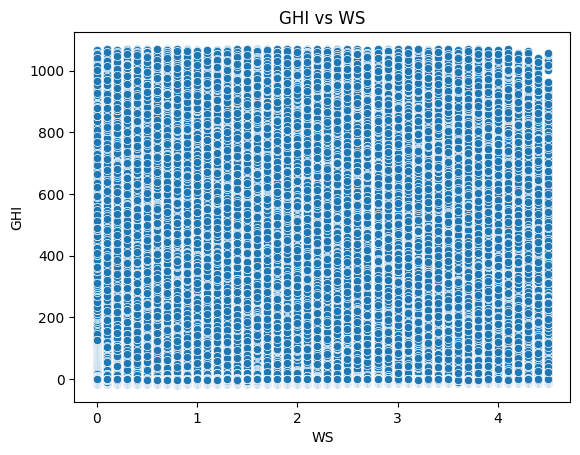

In [25]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('GHI vs WS')
plt.show()

### WSgust vs GHI

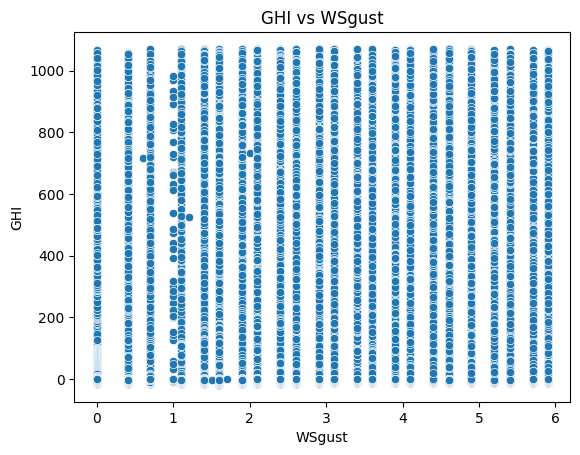

In [26]:
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('GHI vs WSgust')
plt.show()

### Wind Direction vs GHI

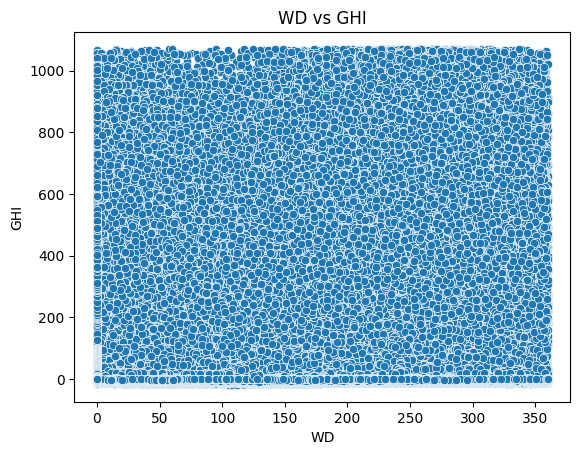

In [27]:
sns.scatterplot(data=df, x='WD', y='GHI')
plt.title('WD vs GHI')
plt.show()

### RH vs Tamb

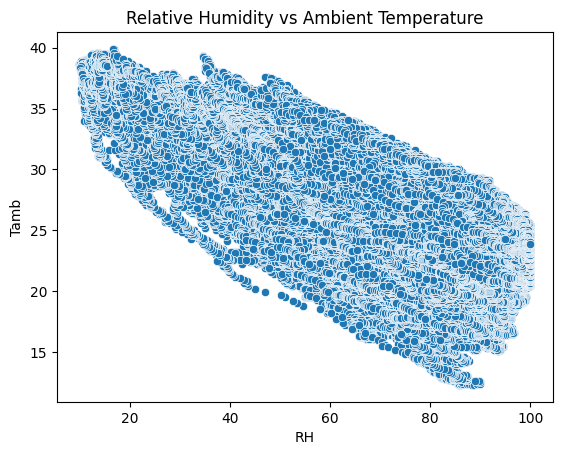

In [28]:
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

### RH vs GHI

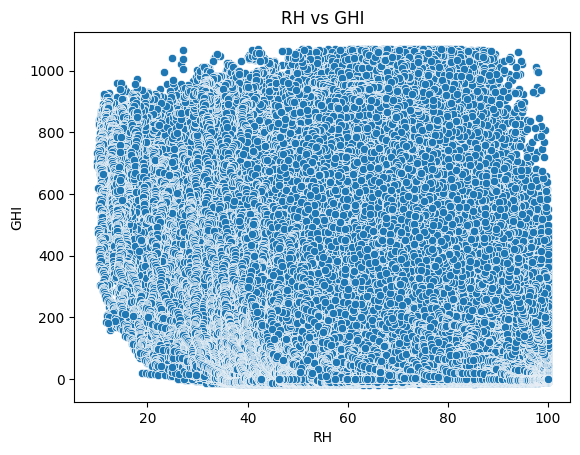

In [29]:
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title('RH vs GHI')
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Bereket\\Documents\\week0\\solar-challenge-week1\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

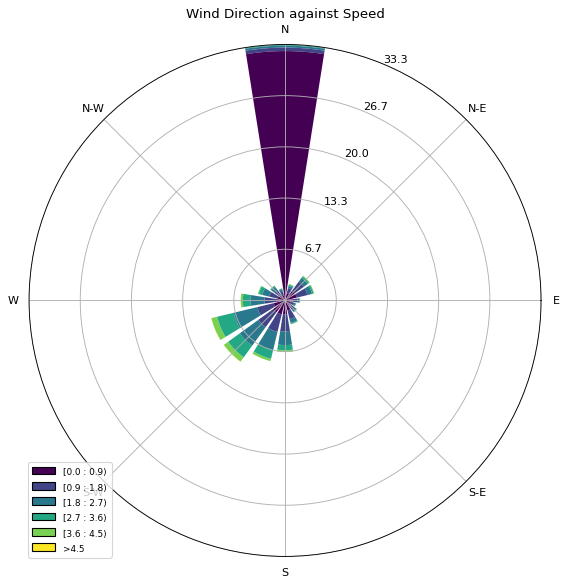

In [30]:
ax=WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8)
ax.set_legend()
plt.title('Wind Direction against Speed')
plt

## Histogram for GHI

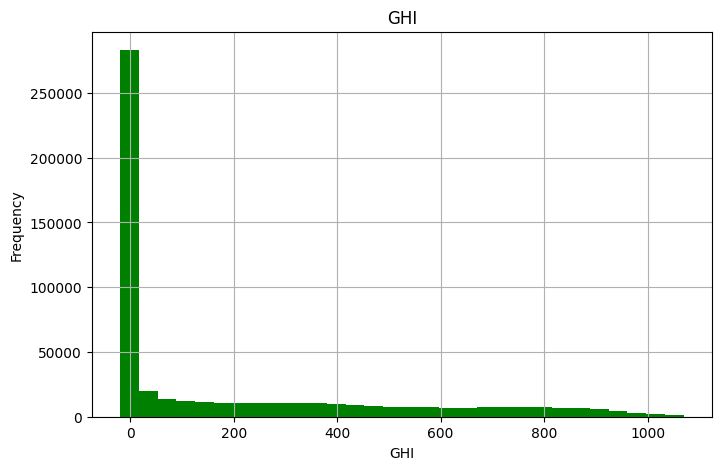

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(df['GHI'], bins=30, color='green')
plt.title("GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Histogram for WS

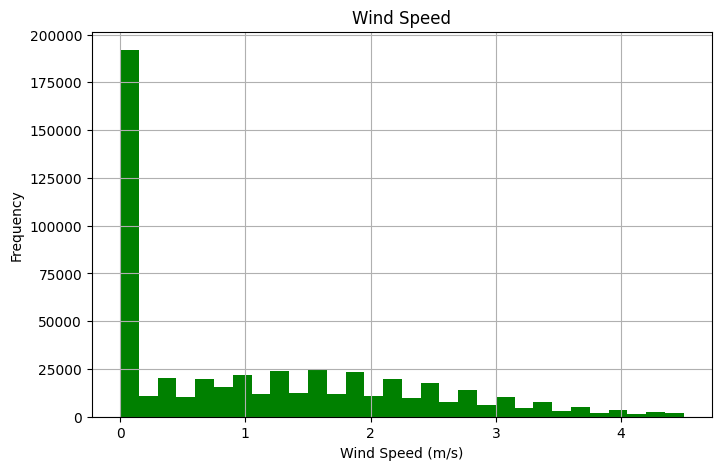

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(df['WS'], bins=30, color='green')
plt.title("Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Histogram for DNI

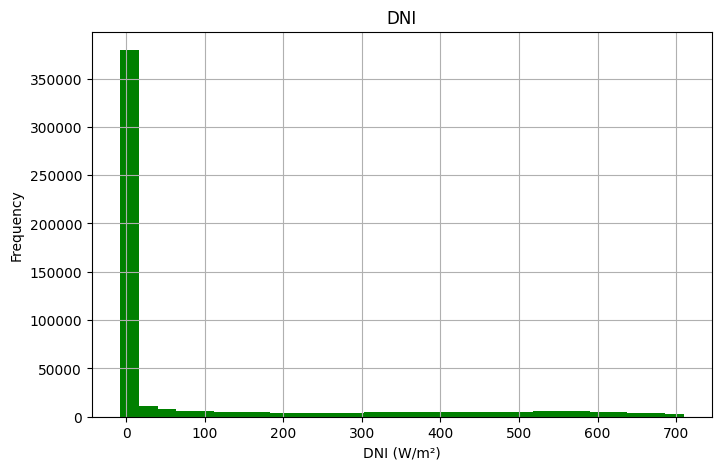

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df['DNI'], bins=30, color='green')
plt.title("DNI")
plt.xlabel("DNI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

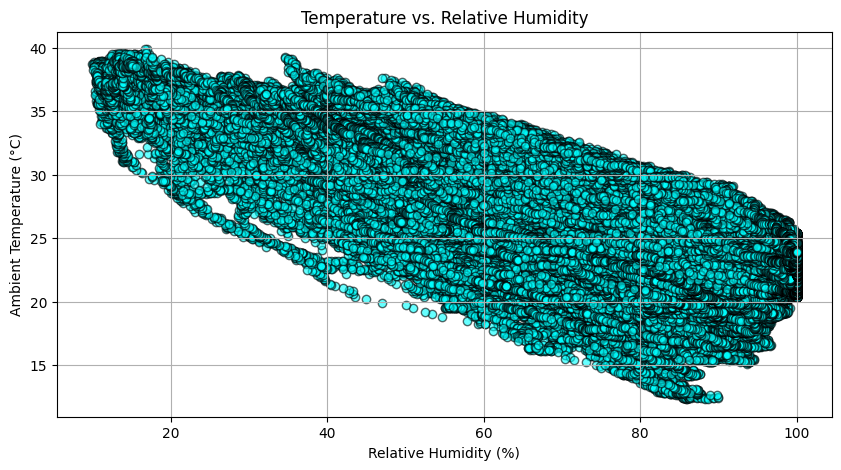

Correlation between RH and Tamb: -0.79


In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.6, color='aqua', edgecolor='black')
plt.title("Temperature vs. Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.show()

# Optional: Correlation
corr = df[['RH', 'Tamb']].corr().iloc[0,1]
print(f"Correlation between RH and Tamb: {corr:.2f}")


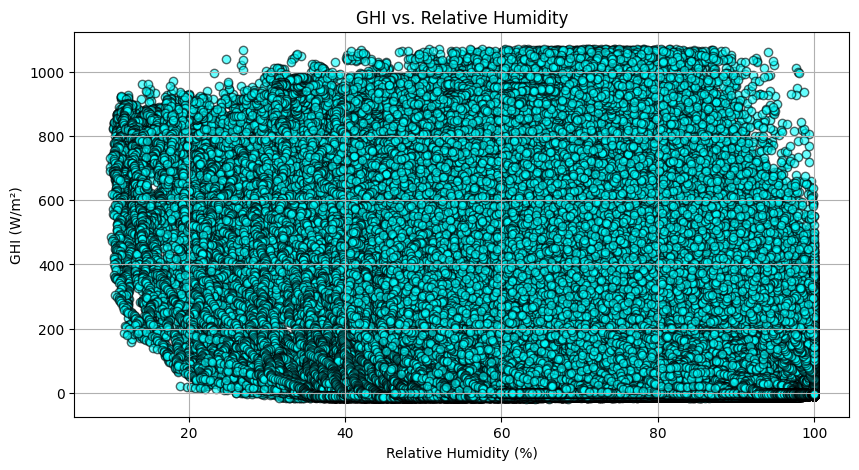

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['GHI'], alpha=0.6, color='aqua', edgecolor='black')
plt.title("GHI vs. Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


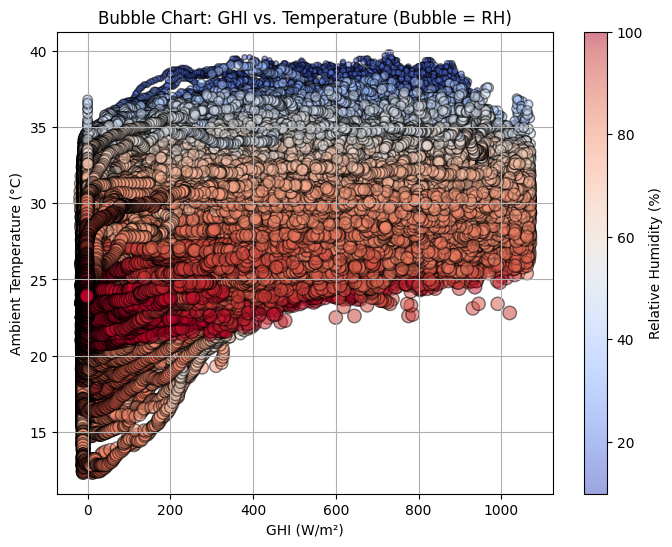

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'],alpha=0.5, c=df['RH'], cmap='coolwarm', edgecolors='k')
plt.title("Bubble Chart: GHI vs. Temperature (Bubble = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.show()
